# Airbnb in New York
A company has collected New York housing rental data from the Airbnb app during 2019. This dataset was used to train Machine Learning models during that year, in an open competition. <br>

We will now use it to conduct a study about the variables that make up the dataset in order to understand it and draw conclusions about it.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
df_raw.sample(10, random_state=2024)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28848,22260546,HUGE room in prime BUSHWICK,150837630,Dan,Brooklyn,Bushwick,40.69967,-73.92990,Private room,50,3,16,2019-05-19,0.85,1,0
24324,19588190,1BR - Heart of West Village - 30 Day Min - Unit 4,4422523,Marie,Manhattan,West Village,40.73541,-74.00331,Entire home/apt,190,30,1,2019-05-17,0.57,6,277
6376,4644669,Upper East Side,24046558,M David,Manhattan,Upper East Side,40.76358,-73.96464,Entire home/apt,325,5,64,2019-06-08,1.15,1,330
15136,12087785,Clinton Hill Oversized One Bedroom,54378184,Eej,Brooklyn,Clinton Hill,40.69106,-73.96529,Entire home/apt,169,12,13,2019-06-24,0.34,3,365
13476,10090735,Studio Apt at the Heart of Chelsea,6772290,Andrew,Manhattan,Chelsea,40.74156,-74.00037,Entire home/apt,175,3,136,2019-06-28,3.18,1,288
20060,16065618,Times Sqaure Gem,87518679,Michelle,Manhattan,Hell's Kitchen,40.76009,-73.98937,Entire home/apt,280,5,1,2017-01-02,0.03,1,0
1198,511436,"Wake up to the skyline of the city, prime loca...",2519356,Darya,Brooklyn,Williamsburg,40.71390,-73.96553,Entire home/apt,96,3,1,2018-05-26,0.07,1,0
42170,32740475,Sonder | The Nash | Cozy Studio + Grilling Area,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74835,-73.97612,Entire home/apt,244,2,9,2019-06-13,2.31,327,133
22665,18342727,Comfy and Quiet Private Room in Brooklyn,33870377,Muath,Brooklyn,Bushwick,40.69432,-73.92035,Private room,199,4,2,2017-05-07,0.07,1,179
2387,1171674,Great One-Bed in the West Village,6414916,Jon,Manhattan,Greenwich Village,40.73020,-74.00165,Entire home/apt,225,2,136,2019-06-22,1.83,1,10


In [23]:
# Verificar si hay duplicados
df_raw = df_raw.drop_duplicates()
df_raw.shape

(48895, 16)

In [24]:
# Eliminar datos que no son relevantes 
df_interim = df_raw.copy()
df_interim.drop(["id", "host_id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df_interim.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [26]:
# Convertir las variables categóricas
df_interim["neighbourhood_group"] = pd.Categorical(df_interim["neighbourhood_group"])
df_interim["neighbourhood"] = pd.Categorical(df_interim["neighbourhood"])
df_interim["room_type"] = pd.Categorical(df_interim["room_type"])


In [27]:
df = df_interim.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  int64   
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   calculated_host_listings_count  48895 non-null  int64   
 9   availability_365                48895 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 2.8 MB


In [28]:
df.describe(include= np.number).T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [29]:
df.describe(include="category").T

,count,unique,top,freq
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409


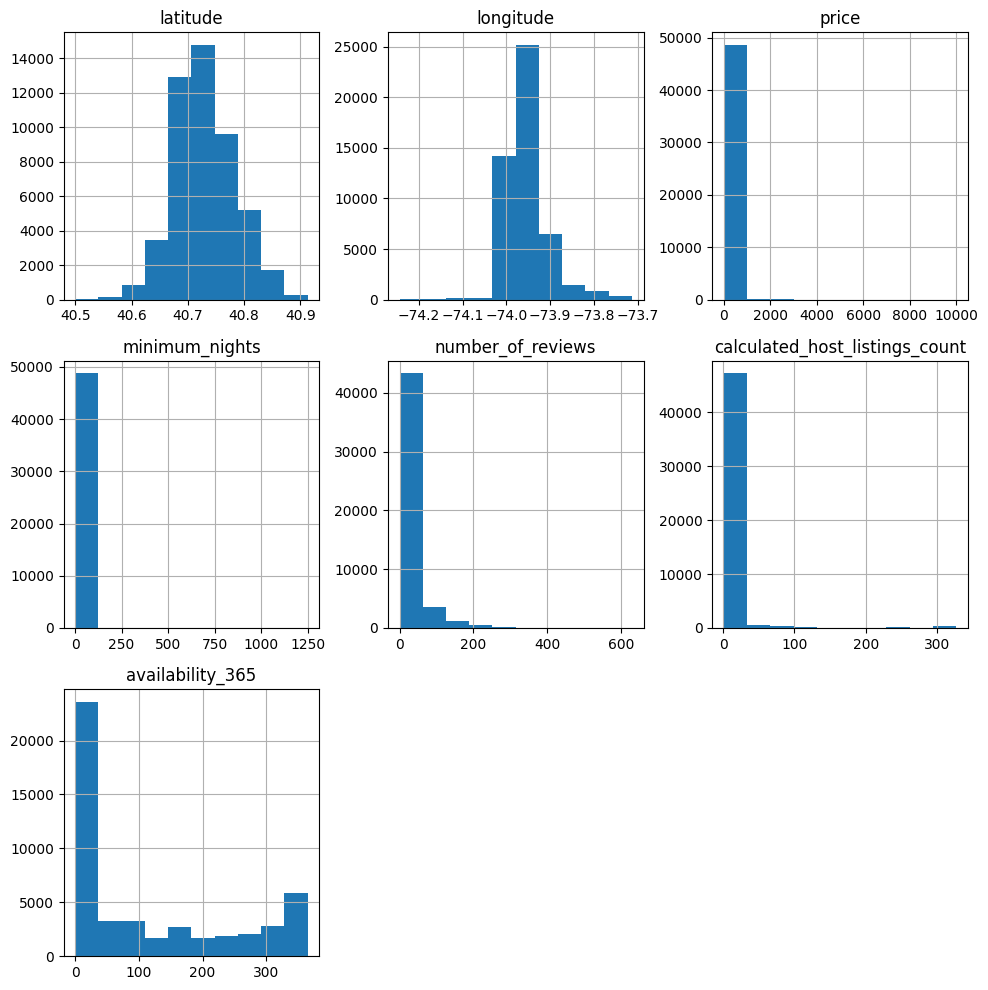

In [31]:
# Análisis univariado variables numéricas
df.select_dtypes(include=np.number).hist(figsize=(10,10))
plt.tight_layout()
plt.show()

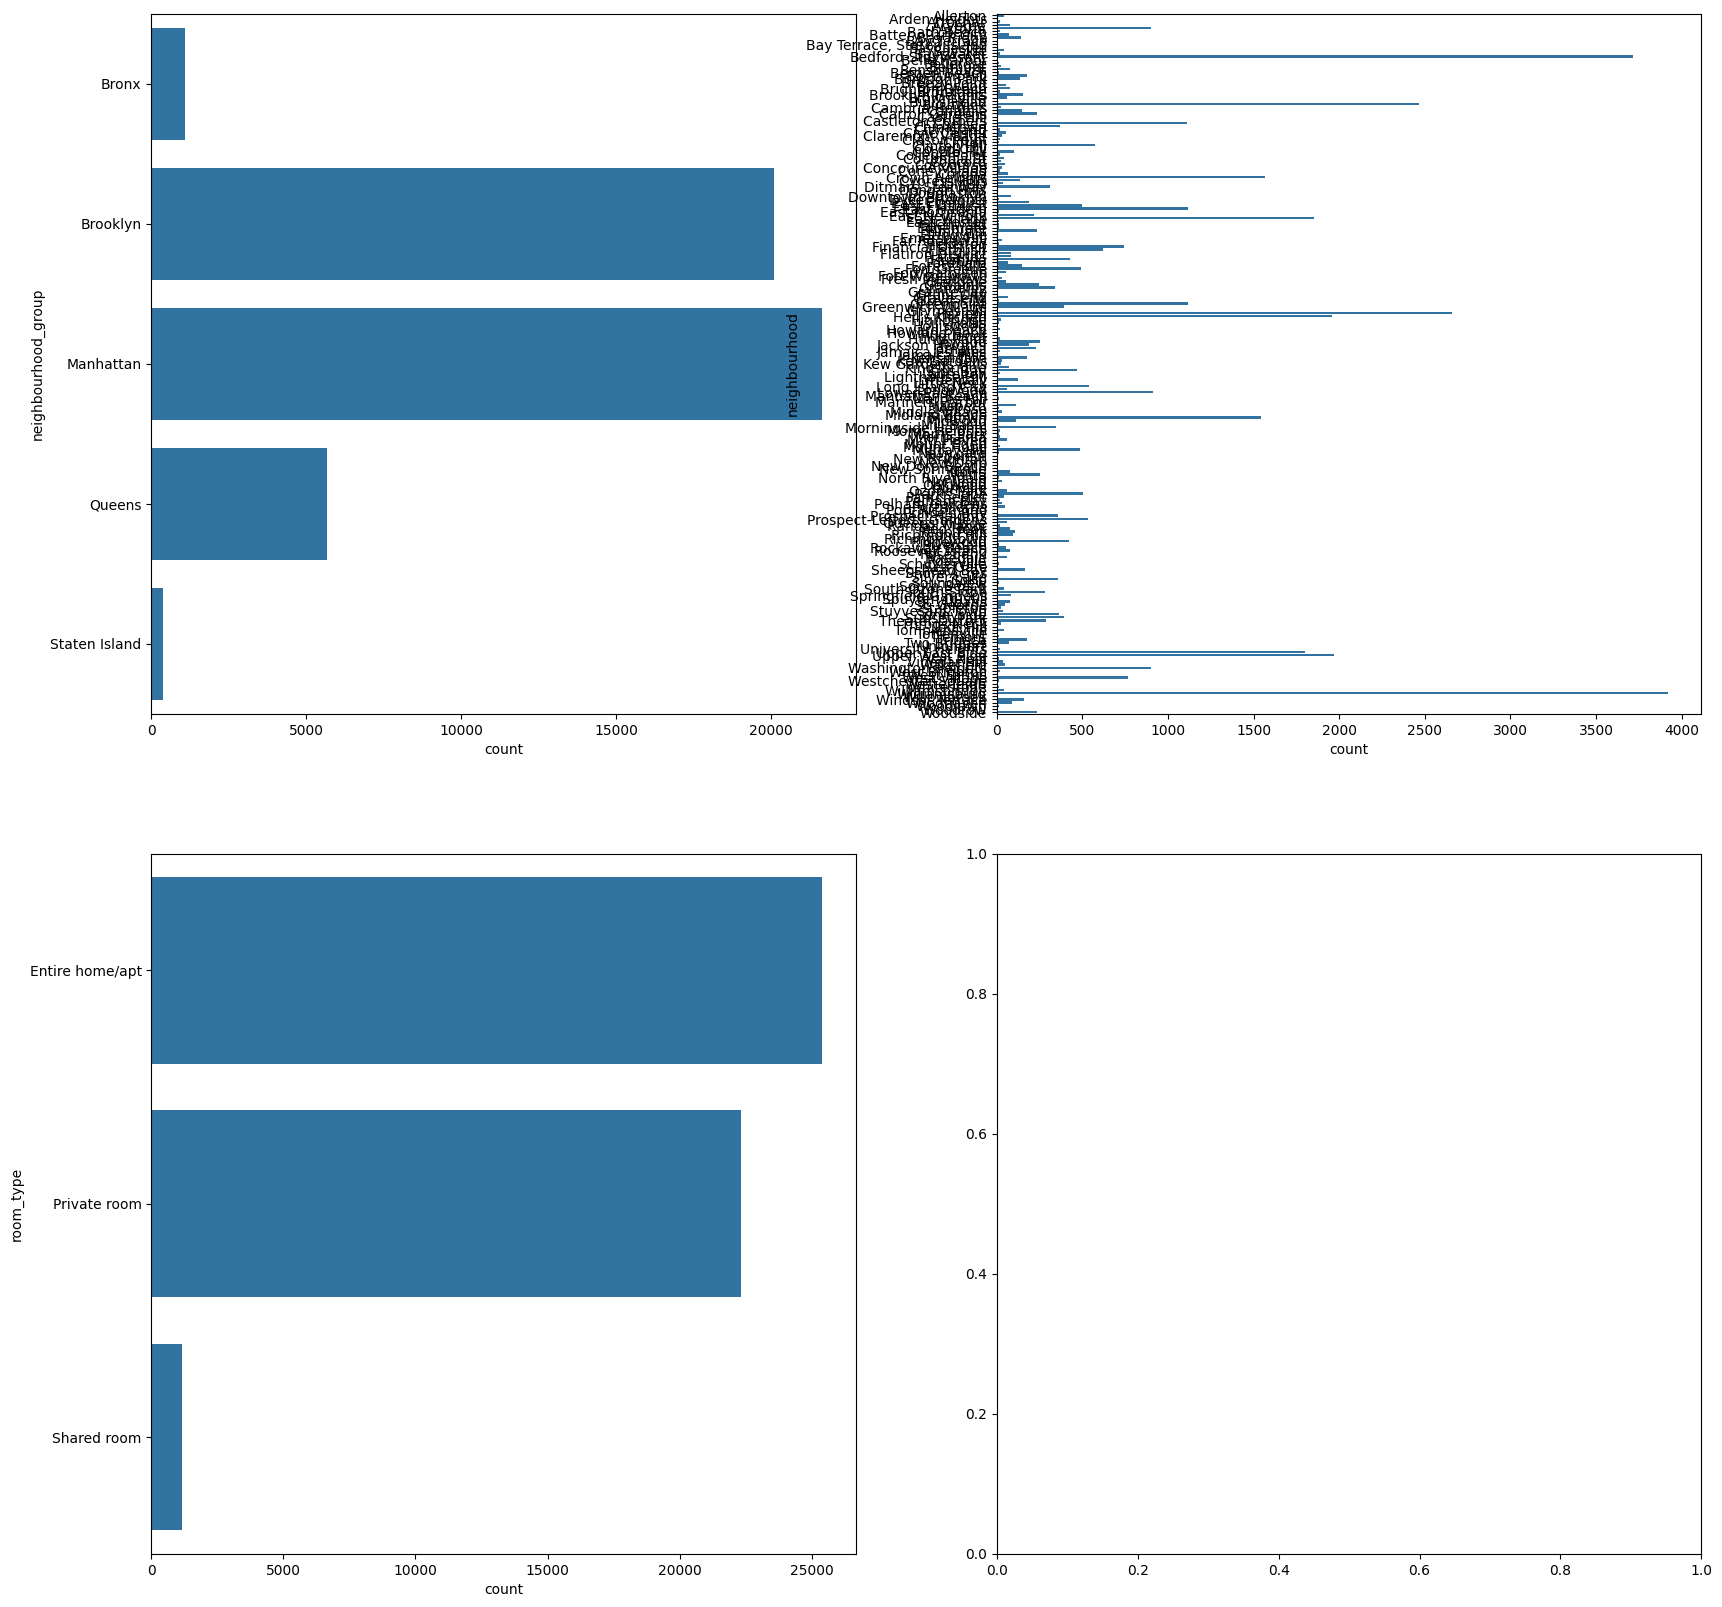

In [34]:
# Análisis univariado categórico
fig, axis = plt.subplots(2,2, figsize=(20, 20))
sns.countplot(ax= axis[0,0], data=df, y="neighbourhood_group")
sns.countplot(ax= axis[0,1], data=df, y="neighbourhood")
sns.countplot(ax= axis[1,0], data=df, y="room_type")

plt.show()

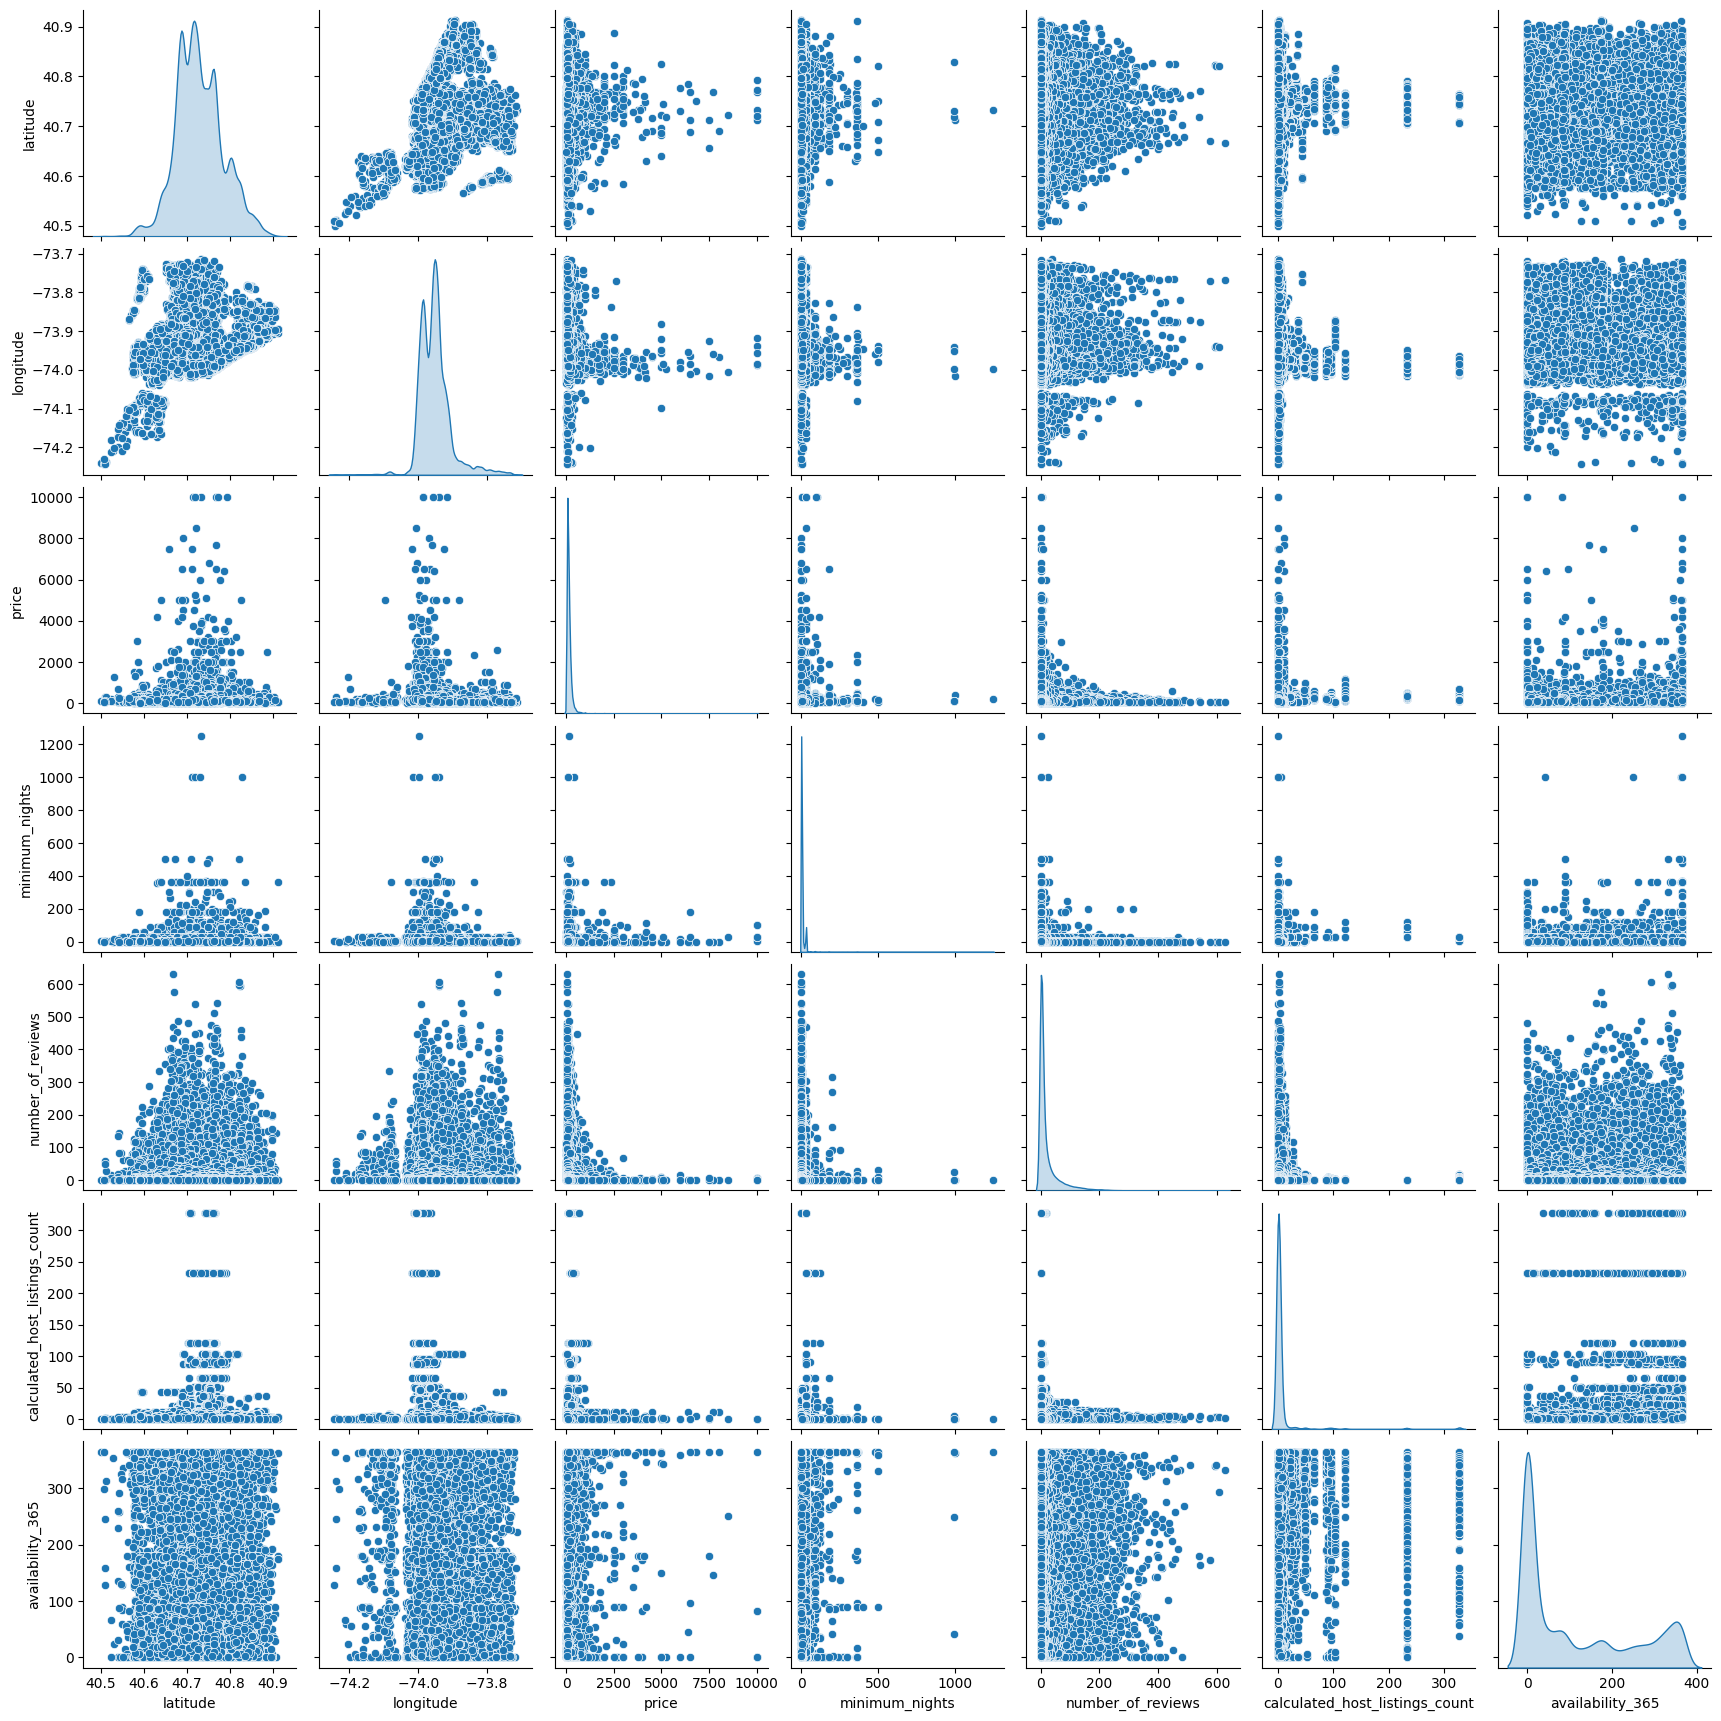

In [35]:
# Análisis bivariado numérico vs numérico
sns.pairplot(data= df.select_dtypes(include=np.number), diag_kind="kde")
plt.show()

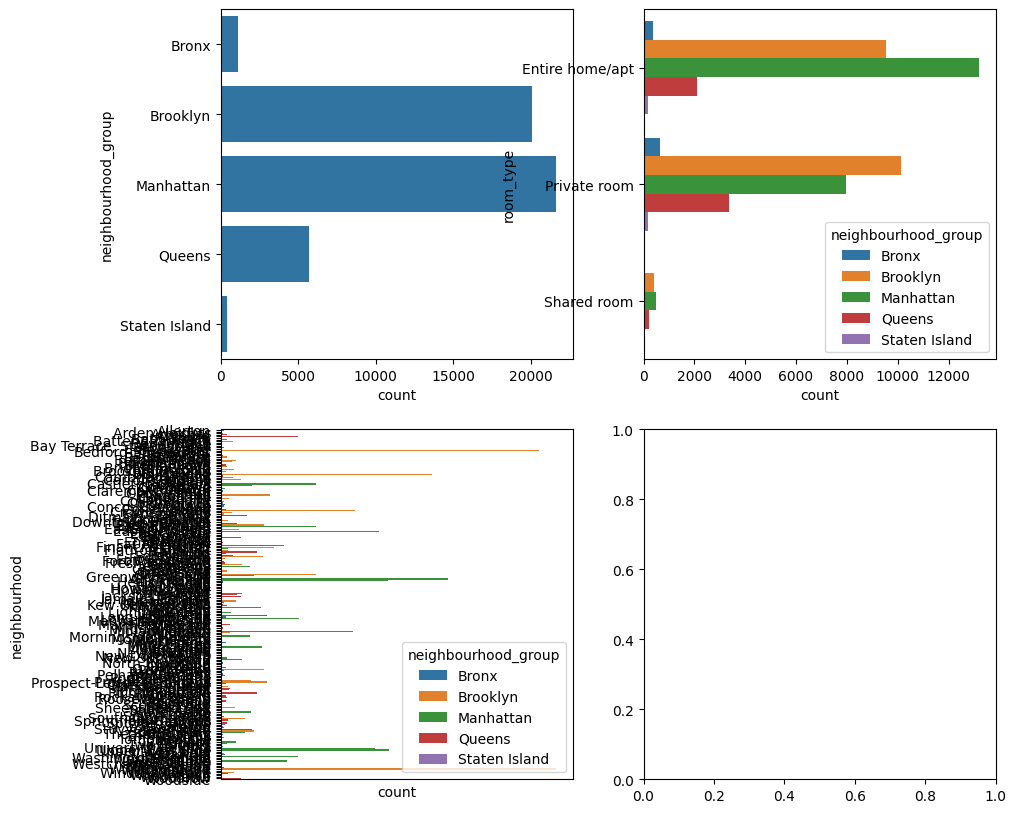

In [38]:
# Análisis bivariado categorico vs categórico
fig, axis = plt.subplots(2,2, figsize=(10,10))
sns.countplot(ax= axis[0,0], data=df, y="neighbourhood_group")
sns.countplot(ax= axis[0,1], data=df, y="room_type", hue="neighbourhood_group")
sns.countplot(ax= axis[1,0], data=df, y="neighbourhood", hue="neighbourhood_group").set_xticks([])

plt.show()

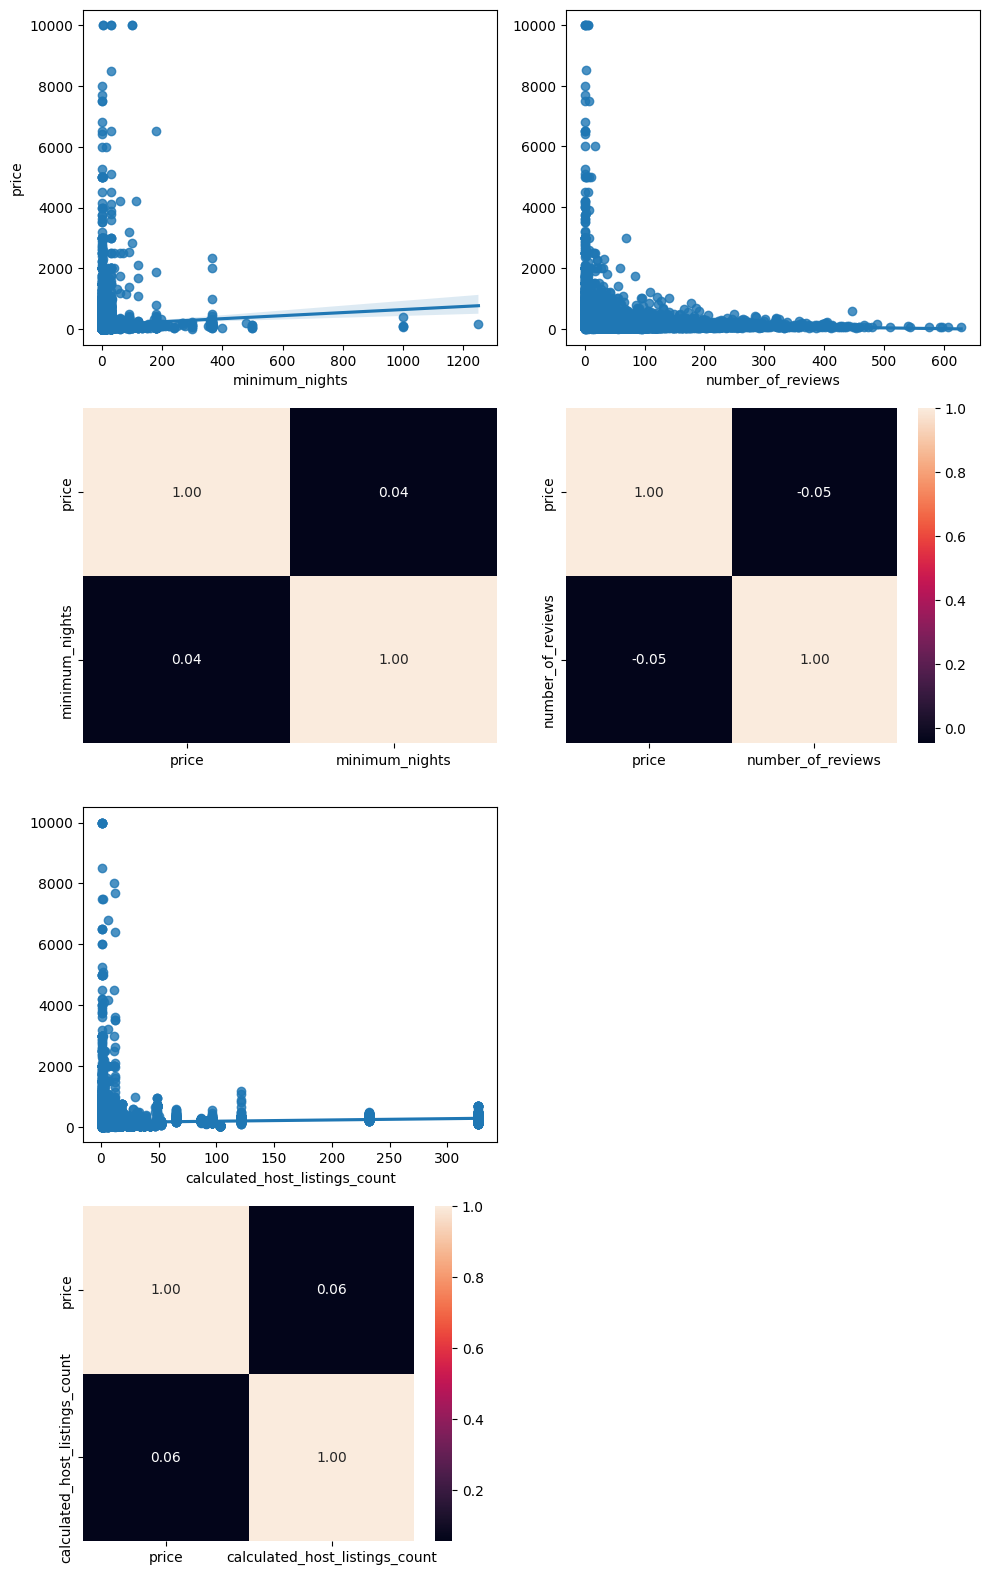

In [ ]:

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

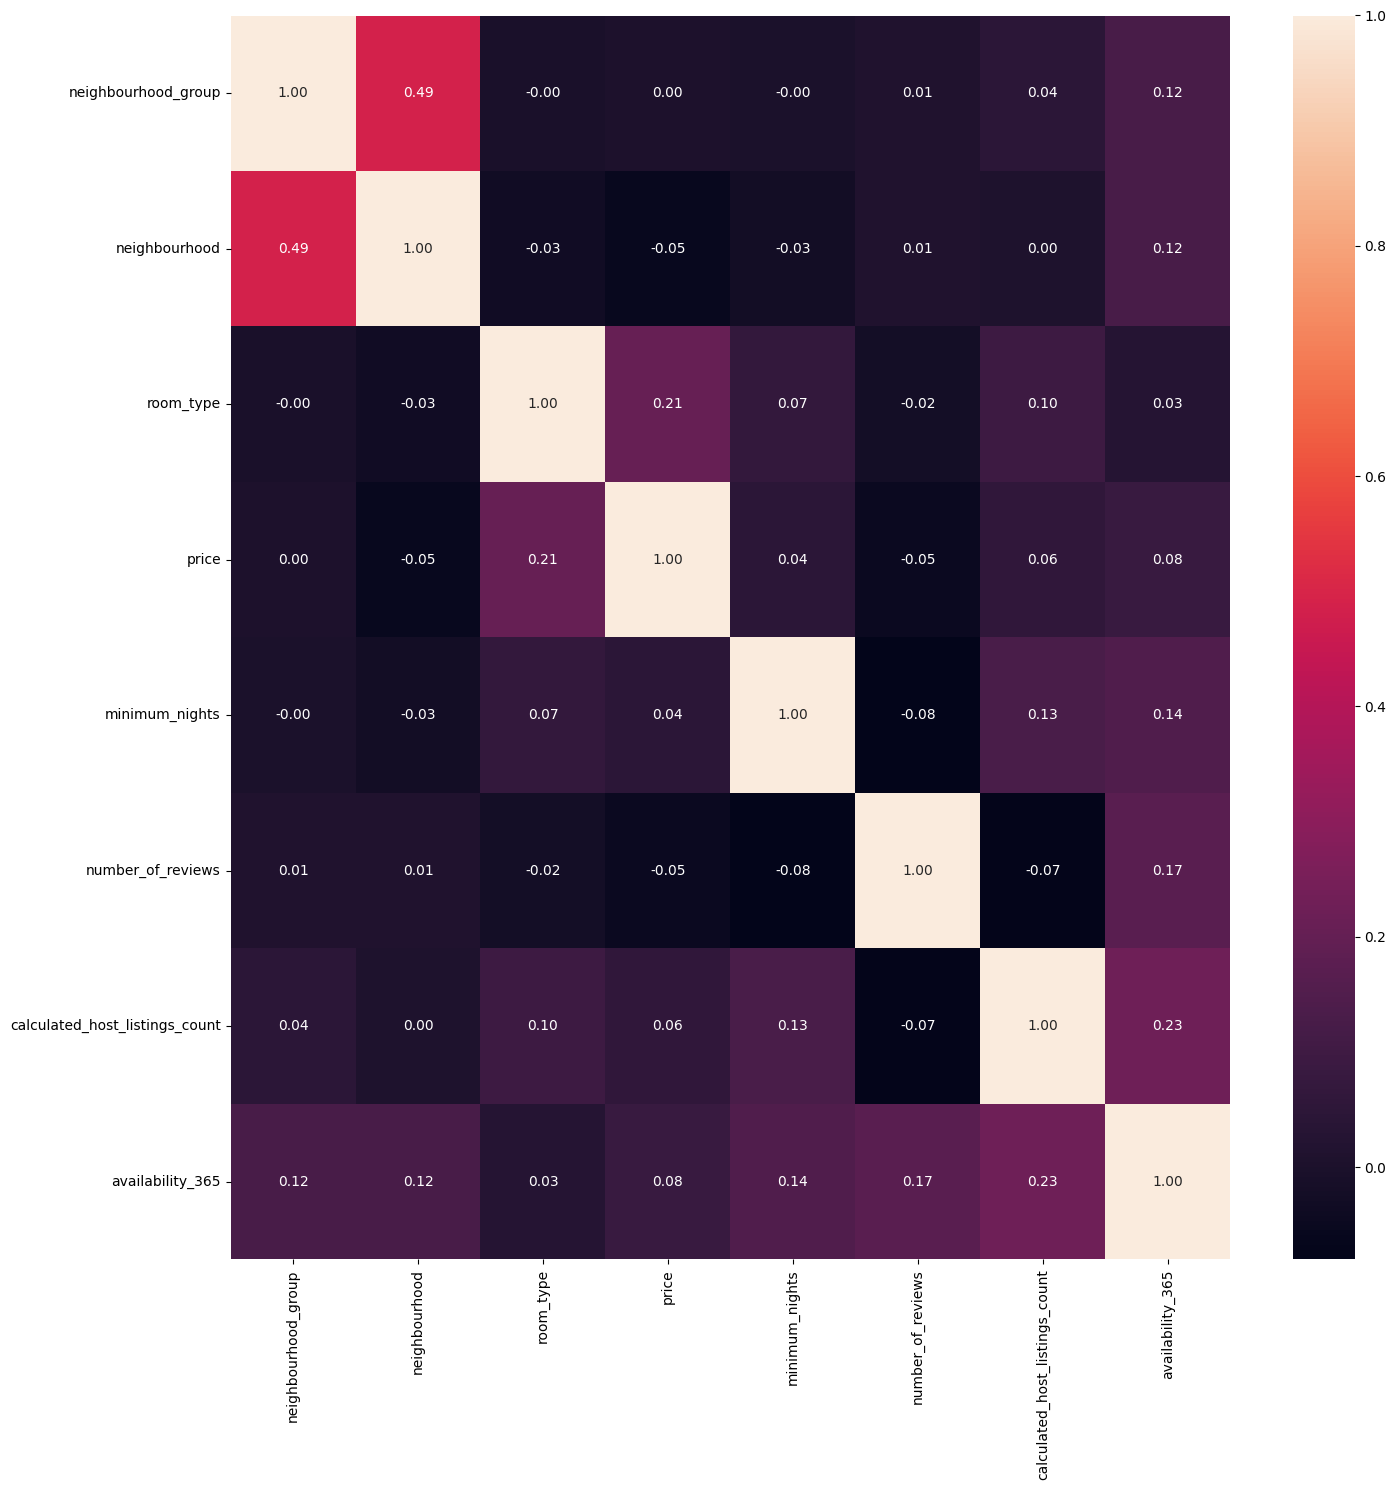

In [41]:
# Análisis variables numéricas vs categóricas

df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

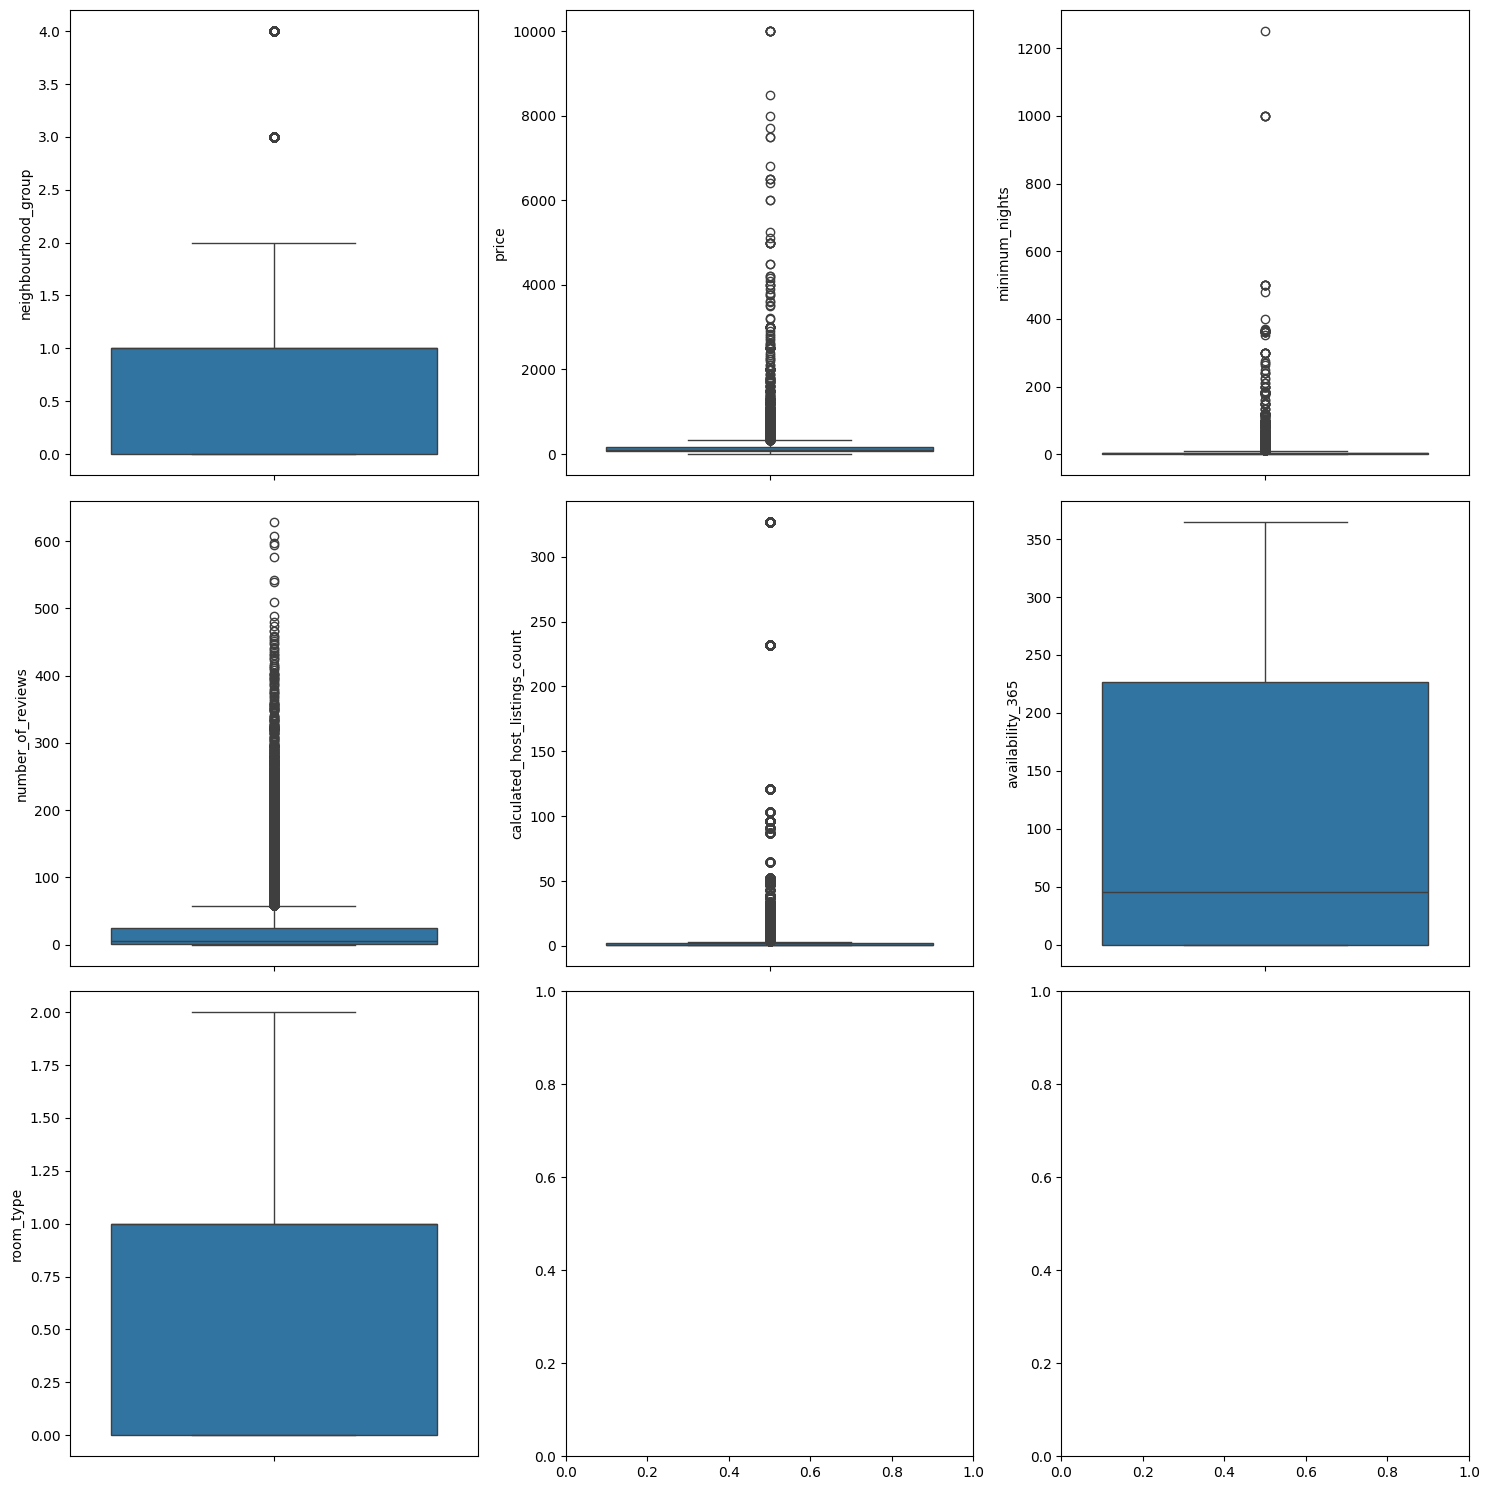

In [42]:
# Detección de Outliers
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

In [ ]:
# Limpiar los outliers del precio
df = df[df["price"] > 0]


In [45]:
count_0 = df[df["price"] == 0].shape[0]
count_1 = df[df["price"] == 1].shape[0]

print("Cuenta de valores 0: ", count_0)
print("Cuenta de valores 1: ", count_1)

Cuenta de valores 0:  0
Cuenta de valores 1:  0


In [47]:
# Limpiar los outliers de minimum_nights
df = df[df["minimum_nights"] <= 15]

In [46]:
# Limpiar los outliers de calculated_host_lisntings_count
df = df[df["calculated_host_listings_count"] > 4]

In [48]:
# Verificar que no existan valores faltantes
df.isnull().sum().sort_values(ascending = False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [50]:
# Escalado de funciones
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal["price"] = df["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


In [51]:
# Selección de funciones
from sklearn.feature_selection import chi2, SelectKBest
X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


In [58]:
# Guardar los datos limpios y sin procesar
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("data/processed/clean_test.csv", index = False)
